In [87]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import gridspec

# General Parameters

In [90]:
N = 2 # Number of species
N_1 = 3 # Number of resources
#N_1 = 2 # Number of resources #Fig 6
Dim = N + N_1 # Total dimension size

# Time parameters
t_start = 0.
t_end = 50.
t_step = 0.1

# Parameters Fig 4

In [93]:
#Parameters Chemostat
phi = 2

Stilde = np.array([50., 1., 1.])

K = np.array([[200., 0., 200.], [200., 200., 0.]])

v = np.array([[1, 1], [-0.2, 0.1], [0.1, -0.2]])

# Growthrates
#mu = np.array([800,800]) #Fig 4a
mu = np.array([1600,1600]) #Fig 4b
#mu = np.array([2400,1200]) #Fig 4c
#mu = np.array([2400,2400]) #Fig 4d

In [95]:
#Parameters Lotka 
d = phi
#r = np.array([mu[0]/(K[0][0]*K[1][1]), mu[1]/(K[1][0]*K[0][2])])
r = np.array([1400/(K[0][0]*K[1][1]), 1400/(K[1][0]*K[0][2])]) #Fig 4b
#r = np.array([1900/(K[0][0]*K[1][1]), 1100/(K[1][0]*K[0][2])]) #Fig 4c
a = np.array([Stilde[0]*Stilde[2], Stilde[0]*Stilde[1]])
b = np.array([[-v[2][0]*Stilde[0]-v[0][0]*Stilde[2], -v[2][1]*Stilde[0]-v[0][1]*Stilde[2]],
             [-v[1][0]*Stilde[0]-v[0][0]*Stilde[1], -v[1][1]*Stilde[0]-v[0][1]*Stilde[1]]]) #[[b11,b12],[b21,b22]]
c = np.array([[0, -v[2][1]*v[0][1]], [-v[1][0]*v[0][0],0]])

In [97]:
#Parameters Solver
y_init = np.array([1, 1, 5., 2., 2.])  # Initial conditions
t_span = (t_start, t_end)
t_eval = np.linspace(t_start, t_end, int((t_end - t_start) / t_step))

#Parameters needed for Timetrace
n_simulations = 10
x0_list = np.linspace(0.1, 20, n_simulations) #Initial 

# Parameters Fig 5

In [100]:
#Parameters Chemostat
#phi = 2

#Stilde = np.array([50., 1., 1.])

#K = np.array([[200., 0., 200.], [200., 200., 0.]])

#v = np.array([[1, 1], [-0.2, 0.1], [0.1, -0.2]])

# Growthrates
#mu = np.array([800,800]) #Fig 5a
#mu = np.array([1600,1600]) #Fig 5b
#mu = np.array([2400,1200]) #Fig 5c
#mu = np.array([2400,2400]) #Fig 5d

In [102]:
#Parameters Lotka 
#d = phi
#r = np.array([mu[0]/(K[0][0]*K[1][1]), mu[1]/(K[1][0]*K[0][2])])
#r = np.array([1400/(K[0][0]*K[1][1]), 1400/(K[1][0]*K[0][2])]) #Fig 5b
#r = np.array([1900/(K[0][0]*K[1][1]), 1100/(K[1][0]*K[0][2])]) #Fig 5c
#a = np.array([Stilde[0]*Stilde[2], Stilde[0]*Stilde[1]])
#b = np.array([[-v[2][0]*Stilde[0]-v[0][0]*Stilde[2], -v[2][1]*Stilde[0]-v[0][1]*Stilde[2]],
             #[-v[1][0]*Stilde[0]-v[0][0]*Stilde[1], -v[1][1]*Stilde[0]-v[0][1]*Stilde[1]]]) #[[b11,b12],[b21,b22]]
#c = np.array([[0, 0.000001], [0.000001, 0]]) #removal of higher order intercation

In [104]:
#Parameters Solver
#y_init = np.array([1, 1, 5., 2., 2.])  # Initial conditions
#t_span = (t_start, t_end)
#t_eval = np.linspace(t_start, t_end, int((t_end - t_start) / t_step))

#Parameters needed for Timetrace
#n_simulations = 10
#x0_list = np.linspace(0.1, 20, n_simulations) #Initial 

# Parameters Fig 6

In [107]:
if False: 
    #Parameters Chemostat
    phi = 0.5
    
    Stilde = np.array([10, 10]) #[Stilde0, Stilde1]
    
    K = np.array([0.5, 1., 1.]) #[K10, K20, K21]
    
    v = np.array([[1, 1], [-0.2, 0.1]]) #[[v01, v02], [v11, v12]]
    
    mu = np.array([2.5, 5.])

In [109]:
#Parameters Lotka
#d = phi
#r1 = np.array([0.05/K[0]])
#r2 = np.array([0.05/(K[1] * K[2])])
#a = np.array([Stilde[0] * Stilde[1]])
#b11 = np.array([-v[0][0] * Stilde[1] - v[1][0] * Stilde[0]])
#b12 = np.array([-v[0][1] * Stilde[1] - v[1][1] * Stilde[0]])
#c = np.array([v[0][1] * v[1][1]])

In [111]:
#Parameters Solver
#y_init = np.array([1, 1, 5., 2.])  # Initial conditions
#t_span = (t_start, t_end)
#t_eval = np.linspace(t_start, t_end, int((t_end - t_start) / t_step))

#Parameters needed for Timetrace
#n_simulations = 10
#x0_list = np.linspace(0.1, 20, n_simulations) #Initial 

# Models

In [114]:
def growthrate (s, args=(mu, K)):

    rate = np.zeros(N)
    
    rate[0] = mu[0] * s[0] / (K[0][0] + s[0]) * s[2] / (K[0][2] + s[2])
    rate[1] = mu[1] * s[0] / (K[1][0] + s[0]) * s[1] / (K[1][1] + s[1])
    
    return rate

In [116]:
def dynamicsChemo (t, y, args=(N, Dim, phi, Stilde, v)):

    x = y[:N]
    s = y[N:]
    growth = growthrate(s)

    dyn = np.zeros(Dim)
    dyn[:N] = (growth - phi) * x
    dyn[N:] = phi * (Stilde - s) - v.dot(growth * x)
    #dyn[N:] = phi * (Stilde - s) + v.dot(growth * x) #Model from paper sign changed in code Vet et al
    
    return dyn

In [118]:
def dynamicsLotka (t, y, args=(r, a, b, c, d)):
    
    dyn = r*y*(a+b.dot(y) - c.dot(y*y))- d*y
    
    return dyn

In [120]:
#def growthrate (s, args=(mu, K)): #Fig 6

    #rate = np.zeros(N)
    
    #rate[0] = mu[0] * s[0] / (K[0] + s[0])
    #rate[1] = mu[1] * s[0] / (K[1] + s[0]) * s[1] / (K[2] + s[1])
    
    #return rate

In [122]:
#def dynamicsChemo (t, y, args=(N, Dim, phi, Stilde, v)): #Fig 6

    #x = y[:N]
    #s = y[N:]
    #growth = growthrate(s)

    #dyn = np.zeros(Dim)
    #dyn[:N] = (growth - phi) * x
    #dyn[N:] = phi * (Stilde - s) - v.dot(growth * x)
    
    #return dyn

In [124]:
#def dynamicsLotka (t, y, args=(r1, r2, a, b11, b12, c, d, Stilde, v, N)): #Fig 6
    
    #dyn = np.zeros(N)
    #dyn[:N] = (r1 * (Stilde[0] - v[0][0] * y[0] - v[0][1] * y[1]) - d) * y[0]
    #dyn[N:] = (r2 * (a + b11 * y[0] + b12 * y[1] + c * y[1]*y[1]) - d) * y[1]
    
    #return dyn

# Solver

In [127]:
ResultChem = []
ResultLotka = []
for j in range(n_simulations):
    y_init[0] = x0_list[j]
    y_init[1] = x0_list[j]
    print (f"Running simulation {j+1}/{n_simulations} with y_init: {y_init}")

    solChem = solve_ivp(dynamicsChemo, t_span=(t_start, t_end), y0=y_init, method='BDF', t_eval=t_eval)
    solLotka = solve_ivp(dynamicsLotka, t_span=t_span, y0=y_init[:2], method='BDF', t_eval=t_eval)
    
    ResultChem.append(solChem.y.T)
    ResultLotka.append(solLotka.y.T)

t_grid_chem = solChem.t #Time points extracted from solver
t_grid_lotka = solLotka.t

Running simulation 1/10 with y_init: [0.1 0.1 5.  2.  2. ]
Running simulation 2/10 with y_init: [2.31111111 2.31111111 5.         2.         2.        ]
Running simulation 3/10 with y_init: [4.52222222 4.52222222 5.         2.         2.        ]
Running simulation 4/10 with y_init: [6.73333333 6.73333333 5.         2.         2.        ]
Running simulation 5/10 with y_init: [8.94444444 8.94444444 5.         2.         2.        ]
Running simulation 6/10 with y_init: [11.15555556 11.15555556  5.          2.          2.        ]
Running simulation 7/10 with y_init: [13.36666667 13.36666667  5.          2.          2.        ]
Running simulation 8/10 with y_init: [15.57777778 15.57777778  5.          2.          2.        ]
Running simulation 9/10 with y_init: [17.78888889 17.78888889  5.          2.          2.        ]
Running simulation 10/10 with y_init: [20. 20.  5.  2.  2.]


# Plotting of the Figure

In [132]:
def TimetraceCombined(t_grid_chem, R_chem, t_grid_lotka, R_lotka, t_f=10):
    fig = plt.figure(1, figsize=(10,8), tight_layout=True)
    gs1 = gridspec.GridSpec(2,2)

    #fig.suptitle("Chemostat and Pairwise model comparison", fontsize=22, fontweight='bold')
    ax1a = plt.subplot(gs1[0,:])  # X1
    ax1b = plt.subplot(gs1[1,:])  # X2
    ax1a.set_ylabel(r"$X_1$", fontsize=20)
    ax1a.set_xlim(0, t_f)
    ax1a.set_ylim(0, 20.01)
    ax1b.set_ylabel(r"$X_2$", fontsize=20)
    ax1b.set_xlabel("Time (a.u.)", fontsize=20)
    ax1b.set_xlim(0, t_f)
    ax1b.set_ylim(0, 20.01)
    ax1a.tick_params(axis="x", which="both", bottom=False, labelbottom=False)
    ax1b.xaxis.set_ticks(np.arange(0, t_f, 10))
    ax1b.yaxis.set_ticks(np.arange(0, 21, 10))

    #Plot Chemostat results (black solid line)
    for sim_chem in R_chem:
        ax1a.plot(t_grid_chem, sim_chem[:, 0], '-', color="black", label="Chemostat" if sim_chem is R_chem[0] else "")
        ax1b.plot(t_grid_chem, sim_chem[:, 1], '-', color="black")

    #Plot Lotka-Volterra results (red dotted line)
    for sim_lotka in R_lotka:
        ax1a.plot(t_grid_lotka, sim_lotka[:, 0], 'r--', label="Lotka-Volterra" if sim_lotka is R_lotka[0] else "")
        ax1b.plot(t_grid_lotka, sim_lotka[:, 1], 'r--')

    #Add legend to the top subplot
    ax1a.legend()

    plt.show()
    return

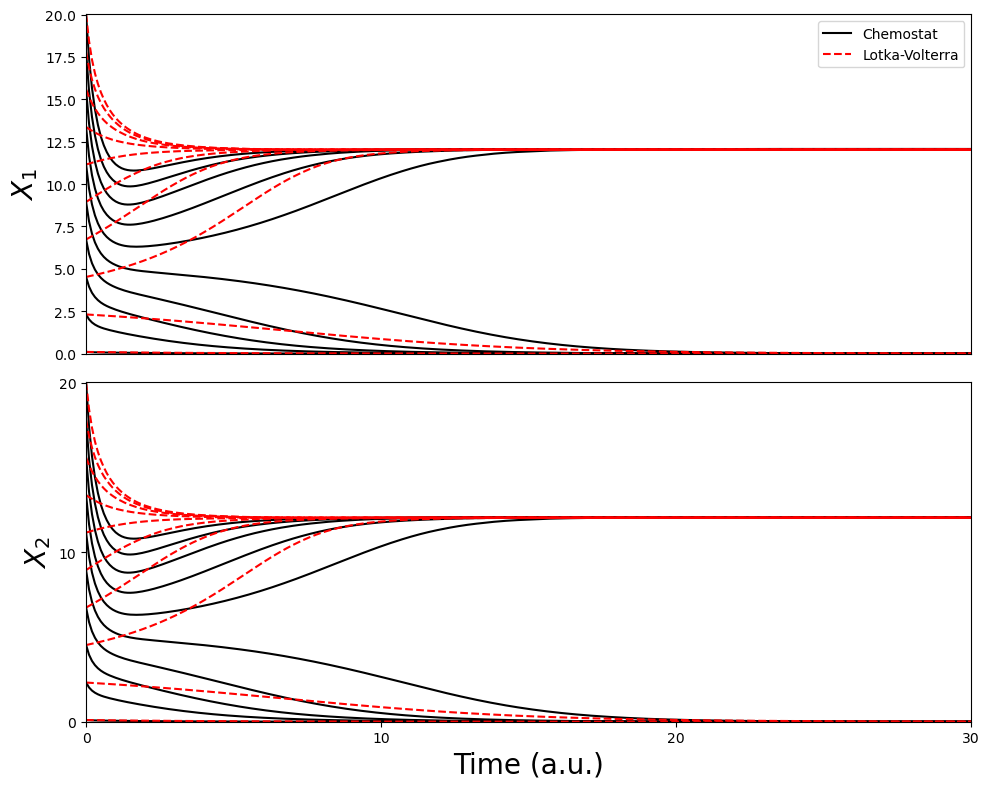

In [134]:
TimetraceCombined(t_grid_chem, ResultChem, t_grid_lotka, ResultLotka, t_f = 30.01)